# 문자열 처리

1) 문자열 데이터 포맷팅

In [2]:
var = 'flesh wound'
s = 'It\'s just a {}!'

print(s.format(var))
print(s.format('scatch'))

It's just a flesh wound!
It's just a scatch!


In [4]:
s = '''It\'s just a {},
It\'s just a {}'''

print(s.format(var, 'scratch'))

It's just a flesh wound,
It's just a scratch


In [5]:
s = '''It\'s just a {1},
It\'s just a {0}'''

print(s.format(var, 'scratch'))

It's just a scratch,
It's just a flesh wound


In [7]:
s = 'Hayden Planetarium Coordinates: {lat}, {lon}' 

print(s.format(lat='40.7815° N', lon='73.9733° W'))

Hayden Planetarium Coordinates: 40.7815° N, 73.9733° W


2) 숫자형 데이터 포맷팅 - {} .format 방식

In [8]:
print('Some digits of pi : {}' .format(3.14159265359))

Some digits of pi : 3.14159265359


In [9]:
#{:,} : 천단위 콤마
print('In 2005, Lu Chao of China recited {:,} digits of pi'.format(67890))

In 2005, Lu Chao of China recited 67,890 digits of pi


In [21]:
#{:.n} : 소수점 이하 숫자를 n개까지 출력
#{:.n%} : 백분률로 환산 출력
print('I remember {0:.4} or {0:.4%} of what Lu Chao recited'.format(7/67890)) #0은 하나의 값이 두군데 삽입되기 때문

I remember 0.0001031 or 0.0103% of what Lu Chao recited
I remember 0.000103108 or 0.0103108% of what Lu Chao recited


In [14]:
#{:n} : n자리로 표현, 남은 공간은 공백으로 채움
#{:0n} : n자리로 표현, 남은 공간은 0으로 채움
print('My ID number is {}' .format(42))
print('My ID number is {:5}' .format(42))
print('My ID number is {:05}' .format(42))

My ID number is 42
My ID number is    42
My ID number is 00042


3) 숫자형 데이터 포맷팅 - % 연산자 방식

In [16]:
s = 'I only know %d digits of pi' %7
print(s)

I only know 7 digits of pi


In [19]:
print('Some difits of %s : %.2f' %('e',2.718))
print('Some difits of %(cont)s : %(value).2f' %{'cont':'e','value':2.718})

Some difits of e : 2.72
Some difits of e : 2.72


4) f-string 포맷팅
: 문자열 앞에 f를 붙여주고 {}안에 넣어줄 변수를 입력

In [22]:
var = 'flesh wound'
s = f'It\'s just a {var}'
print(s)

It's just a flesh wound


In [24]:
lat='40.7815°N' 
lon='73.9733°W' 
s = f'Hayden Planetarium Coordinates: {lat}, {lon}'
print(s)

Hayden Planetarium Coordinates: 40.7815°N, 73.9733°W


# apply()

1) 시리즈와 apply()

In [26]:
def my_sq(x):
    return x**2

def my_exp(x, n):
    return x**n

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame({'a':[10, 20, 30], 'b':[20, 30, 40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [38]:
print(type(df['a']))
print('\n--- ** 연산 ---')
print(df['a'] ** 2)

print('\n--- apply() 이용 브로드캐스트 ---')
sq = df['a'].apply(my_sq)
print(sq)

<class 'pandas.core.series.Series'>

--- ** 연산 ---
0    100
1    400
2    900
Name: a, dtype: int64

--- apply() 이용 브로드캐스트 ---
0    100
1    400
2    900
Name: a, dtype: int64


In [43]:
ex = df['a'].apply(my_exp, n=3) #첫번째 인자는 자동으로 시리즈나 데이터프레임 전달
print(ex)

0     1000
1     8000
2    27000
Name: a, dtype: int64


2) 데이터프레임과 apply()

In [44]:
df = pd.DataFrame({'a':[10,20,30], 'b':[20,30,40]})
df

,a,b
0,10,20
1,20,30
2,30,40


In [45]:
def print_me(x):
    print(x)

In [53]:
print('--- axis = 0 ---')
df.apply(print_me) #열별로 행마다 적용
print('--- axis = 1 ---')
df.apply(print_me, axis=1) #행별로 열마다 적용

--- 행방향 axis = 0 ---
0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64
--- 열방향 axis = 1 ---
a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [54]:
def avg_3_apply(col):
    sum = 0
    for item in col:
        sum += item
    return sum / df.shape[0]

def avg_2_apply(row):
    sum = 0
    for item in row:
        sum += item
    return sum / df.shape[1]

In [55]:
df.apply(avg_3_apply)

a    20.0
b    30.0
dtype: float64

In [56]:
df.apply(avg_2_apply, axis=1) #결과는 시리즈 타입 

0    15.0
1    25.0
2    35.0
dtype: float64

3) 데이터프레임의 누락값을 처리한 후 apply

In [59]:
import seaborn as sns
import numpy as np

In [58]:
titanic = sns.load_dataset('titanic')
titanic.info() #age, embarked,,, 결측값 포함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
#누락값 개수 반환 함수
def count_missing(vec): #apply => 열별 적용(axis=0)
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

#누락값 비율 계산 함수
def prop_missing(vec):
    num = count_missing(vec) #누락값 개수
    dem = vec.size #전체 개수
    return num / dem

#누락값이 아닌 정상 데이터 비율 계산 함수
def prop_complete(vec):
    return 1 - prop_missing(vec)

In [64]:
cmis_col = titanic.apply(count_missing)
cmis_col

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
pmis_col = titanic.apply(prop_missing)
pmis_col

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [76]:
1 - pmis_col

pcom_col = titanic.apply(prop_complete)
pcom_col

(1-pmis_col) == pcom_col

survived       True
pclass         True
sex            True
age            True
sibsp          True
parch          True
fare           True
embarked       True
class          True
who            True
adult_male     True
deck           True
embark_town    True
alive          True
alone          True
dtype: bool

In [79]:
cmis_row = titanic.apply(count_missing, axis=1)
pmis_row = titanic.apply(prop_missing, axis=1)
pcom_row = titanic.apply(prop_complete, axis=1)

print('--- 행별 누락 개수 ---')
print(cmis_row.head())
print('--- 행별 누락 비율 ---')
print(pmis_row.head())
print('--- 행별 정상 데이터 비율 ---')
print(pcom_row.head())

--- 행별 누락 개수 ---
0    1
1    0
2    1
3    0
4    1
dtype: int64
--- 행별 누락 비율 ---
0    0.066667
1    0.000000
2    0.066667
3    0.000000
4    0.066667
dtype: float64
--- 행별 정상 데이터 비율 ---
0    0.933333
1    1.000000
2    0.933333
3    1.000000
4    0.933333
dtype: float64


In [82]:
titanic['cnt_missing'] = titanic.apply(count_missing, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cnt_missing
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [90]:
titanic.loc[titanic.cnt_missing > 1, :].sample(10).sort_index()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cnt_missing
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,2
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,2
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True,2
65,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False,2
186,1,3,female,NaN,1,0,15.5000,Q,Third,woman,False,NaN,Queenstown,yes,False,2
563,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
613,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,2
643,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True,2
648,0,3,male,NaN,0,0,7.5500,S,Third,man,True,NaN,Southampton,no,True,2
832,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,2


# 그룹연산

1) 데이터 집계 : 데이터 요약, 정리

In [93]:
df = pd.read_csv('../data/pandas/gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [97]:
#연도별 전세계 기대수명의 평균
avg_lif_exp_by_year = df.groupby('year').lifeExp.mean()
# avg_lif_exp_by_year = df.groupby('year')['lifeExp'].mean()
avg_lif_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

📌groupby()와 함께 사용하는 집계 메소드
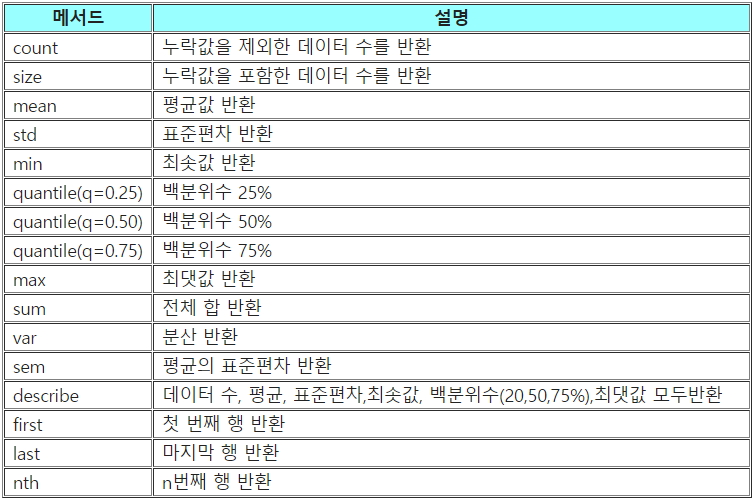

In [98]:
def my_mean(values):
    n = len(values)
    sum = 0
    
    for value in values:
        sum += value
    
    return sum / n

In [100]:
#사용자 정의 함수 사용을 위해서는 agg()에 담아서 사용
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [101]:
def my_mean_diff(values, diff_value): #diff_value = 전체 기대 수명
    n = len(values)
    sum = 0
    
    for value in values:
        sum += value
    
    mean = sum / n
    
    return mean - diff_value

In [105]:
global_mean = df.lifeExp.mean()
global_mean

59.474439366197174

In [107]:
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)
agg_mean_diff

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [116]:
#2개 이상의 함수 적용 - 같은 열에 적용할 경우 : [] 리스트로 전달
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
gdf

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [115]:
#2개 이상의 함수 적용 - 각각 다른 열에 적용할 경우 : {} 딕셔너리로 변수와 함수를 함께 짝지어 전달
gdf_dict = df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', 'gdpPercap':'median'})
gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


# 데이터 변환

1) 표준화 : 서로 다른 스케일의 데이터를 비교하기 위해

In [117]:
def my_zscore(x):
    return (x - x.mean()) / x.std()

In [146]:
# transform_z = df.groupby('year').lifeExp.transform(my_zscore)
transform_z = df.lifeExp.transform(my_zscore)
transform_z

0      -2.374637
1      -2.256112
2      -2.127213
3      -1.970599
4      -1.810501
          ...   
1699    0.222694
1700    0.069873
1701   -0.980517
1702   -1.508499
1703   -1.237695
Name: lifeExp, Length: 1704, dtype: float64

#agg : 사용자 정의 함수 호출 시, 여러개의 일반 함수 호출 시=> 집계함수
#transform : 데이터를 변환시켜주는 함수 호출 시=> 변환

In [126]:
np.random.seed(42)
tips_10 = sns.load_dataset('tips').sample(10)
tips_10 = tips_10.rename({'sex':'gender'}, axis='columns')
tips_10

,total_bill,tip,gender,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


#numpy.random.permutation(x) : x의 원소를 무작위 추출

In [135]:
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
tips_10

,total_bill,tip,gender,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [136]:
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [140]:
total_bill_group_mean = tips_10.groupby('gender').total_bill.transform(fill_na_mean)

tips_10['fill_total_bill'] = total_bill_group_mean
tips_10

,total_bill,tip,gender,smoker,day,time,size,fill_total_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


# 데이터 필터링

In [150]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [155]:
tips['size'].value_counts() #인원수당 방문수

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [153]:
tips_filtered = tips.groupby('size').\
                        filter(lambda x : x['size'].count() >= 30)
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [156]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

# 그룹 오브젝트

In [166]:
tips_10 = sns.load_dataset('tips').sample(10)
tips_10 = tips_10.rename({'sex' : 'gender'}, axis='columns')
tips_10

,total_bill,tip,gender,smoker,day,time,size
101,15.38,3.00,Female,Yes,Fri,Dinner,2
160,21.50,3.50,Male,No,Sun,Dinner,4
179,34.63,3.55,Male,Yes,Sun,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
143,27.05,5.00,Female,No,Thur,Lunch,6
97,12.03,1.50,Male,Yes,Fri,Dinner,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
3,23.68,3.31,Male,No,Sun,Dinner,2


In [168]:
grouped = tips_10.groupby('gender')
grouped #그룹 객체

In [169]:
grouped.groups #groups 속성으로 확인 가능

{'Male': [160, 179, 97, 49, 83, 3], 'Female': [101, 109, 143, 229]}

1) 그룹 오브젝트의 평균

In [170]:
avg = grouped.mean() #자동 수치형 데이터만 연산됨
avg

,total_bill,tip,size
gender,,,
Male,23.760,3.31,2.333333
Female,19.715,3.72,3.000000


- get_group() : 그룹변수로 분할/그룹핑된 데이터를 분리해서 가져올 수 있음

In [171]:
female = grouped.get_group('Female')
female

,total_bill,tip,gender,smoker,day,time,size
101,15.38,3.00,Female,Yes,Fri,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
143,27.05,5.00,Female,No,Thur,Lunch,6
229,22.12,2.88,Female,Yes,Sat,Dinner,2


In [174]:
for gender_group in grouped:
    print(gender_group)

('Male',      total_bill   tip gender smoker   day    time  size
160       21.50  3.50   Male     No   Sun  Dinner     4
179       34.63  3.55   Male    Yes   Sun  Dinner     2
97        12.03  1.50   Male    Yes   Fri  Dinner     2
49        18.04  3.00   Male     No   Sun  Dinner     2
83        32.68  5.00   Male    Yes  Thur   Lunch     2
3         23.68  3.31   Male     No   Sun  Dinner     2)
('Female',      total_bill   tip  gender smoker   day    time  size
101       15.38  3.00  Female    Yes   Fri  Dinner     2
109       14.31  4.00  Female    Yes   Sat  Dinner     2
143       27.05  5.00  Female     No  Thur   Lunch     6
229       22.12  2.88  Female    Yes   Sat  Dinner     2)


- 2개 이상의 열로 그룹화 : [] 리스트

In [176]:
bill_gender_time = tips_10.groupby(['gender', 'time'])
group_avg = bill_gender_time.mean()
group_avg

total_bill       tip  size
gender time                              
Male   Lunch       32.680  5.000000   2.0
       Dinner      21.976  2.972000   2.4
Female Lunch       27.050  5.000000   6.0
       Dinner      17.270  3.293333   2.0

In [180]:
print(type(group_avg))
print(group_avg.columns)
print(group_avg.index)

<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'size'], dtype='object')
MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['gender', 'time'])


- 그룹 변수 없이 표현 : reset_index() | as_index = False

In [181]:
tips_10.groupby(['gender', 'time']).mean().reset_index()

,gender,time,total_bill,tip,size
0,Male,Lunch,32.680,5.000000,2.0
1,Male,Dinner,21.976,2.972000,2.4
2,Female,Lunch,27.050,5.000000,6.0
3,Female,Dinner,17.270,3.293333,2.0


In [182]:
tips_10.groupby(['gender', 'time'], as_index=False).mean()

,gender,time,total_bill,tip,size
0,Male,Lunch,32.680,5.000000,2.0
1,Male,Dinner,21.976,2.972000,2.4
2,Female,Lunch,27.050,5.000000,6.0
3,Female,Dinner,17.270,3.293333,2.0
